In [1]:
import numpy as np
import matplotlib.pyplot as plt                 # library for plotting the graphs
import random

In [2]:
x = np.linspace(-5,5,100)

In [3]:
y = x**2 # - 4*x - 2

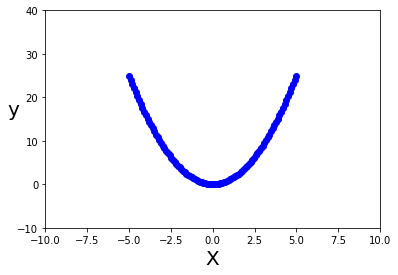

In [4]:
plt.plot(x,y,'bo')
plt.xlabel('X', fontsize = 20)
plt.ylabel('y', fontsize = 20, rotation = 0)
# plt.xlim((-10,10))
# plt.ylim(0,40)
plt.axis([-10,10,-10,40])
plt.show()

In [5]:
np.random.seed(42)
x = 2 * np.random.rand(100,1)

In [6]:
y = 4 + 3 * x

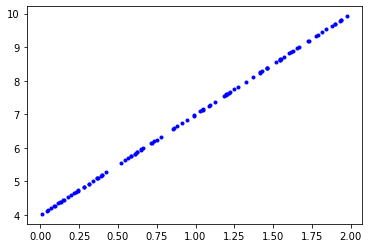

In [7]:
plt.plot(x,y,'b.')
plt.show()

In [8]:
np.random.seed(42)
y = 4 + 3*x + np.random.randn(100,1)            # added gaussian noise
#y =c + m*x 

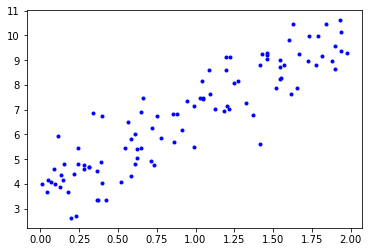

In [9]:
plt.plot(x,y,'b.')
plt.show()

In [10]:
x_b = np.c_[np.ones((100,1)),x]

In [11]:
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [12]:
theta_best

array([[3.70655768],
       [3.20162012]])

In [13]:
c = theta_best[0]
m = theta_best[1]


In [14]:
x_new = np.array([[0.],[2]])
x_new_b = np.c_[np.ones((2,1)),x_new]
y_predict = x_new_b.dot(theta_best)
y_predict

array([[ 3.70655768],
       [10.10979793]])

In [15]:
y_pred_new = m*x_new +c
y_pred_new

array([[ 3.70655768],
       [10.10979793]])

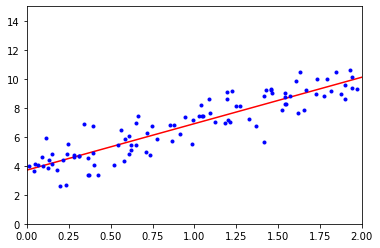

In [16]:
plt.plot(x_new,y_predict,'r-')
plt.plot(x,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(x,y)

LinearRegression()

In [19]:
from sklearn.linear_model import Ridge
rid = Ridge(alpha= 1,solver = 'cholesky', random_state= 42)

In [20]:
Ridge?

Init signature:
Ridge(
    alpha=1.0,
    *,
    fit_intercept=True,
    normalize=False,
    copy_X=True,
    max_iter=None,
    tol=0.001,
    solver='auto',
    random_state=None,
)
Docstring:     
Linear least squares with l2 regularization.

Minimizes the objective function::

||y - Xw||^2_2 + alpha * ||w||^2_2

This model solves a regression model where the loss function is
the linear least squares function and regularization is given by
the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
This estimator has built-in support for multi-variate regression
(i.e., when y is a 2d-array of shape (n_samples, n_targets)).

Read more in the :ref:`User Guide <ridge_regression>`.

Parameters
----------
alpha : {float, ndarray of shape (n_targets,)}, default=1.0
    Regularization strength; must be a positive float. Regularization
    improves the conditioning of the problem and reduces the variance of
    the estimates. Larger values specify stronger regularization.
    A

In [18]:
rid.fit(x,y)

Ridge(alpha=1, random_state=42, solver='cholesky')

In [20]:
rid.intercept_,rid.coef_

(array([3.79008101]), array([[3.11279967]]))

In [102]:
lin_reg.intercept_,lin_reg.coef_

(array([3.70655768]), array([[3.20162012]]))

# Batch Gradient Descent

In [50]:
eta = 0.1
theta = np.random.rand(2,1)
n_iterations = 1000
m = len(x)
batch_x, batch_y = [],[]
for i in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta)-y)
    theta = theta - eta* gradients
    batch_x.append(theta[0])
    batch_y.append(theta[1])

In [51]:
theta.shape

(2, 1)

In [52]:
def gradirnt_descent(eta):
    theta = np.random.rand(2,1)
    n_iterations = 1000
    m = len(x)
    
    for i in range(n_iterations):
        gradients = 2/m * x_b.T.dot(x_b.dot(theta)-y)
        theta = theta - eta* gradients
        
        if i<10:
            style = 'b-' if i>0 else 'r--'
            y_pred = x_new_b.dot(theta)
            plt.plot(x_new, y_pred, style)
    
    plt.plot(x,y,'b.')
    plt.axis([0,2,0,15])
    plt.xlabel('X',fontsize = 20)
    plt.ylabel('y', rotation = 0, fontsize = 20)
    plt.title(f'eta={eta}' )

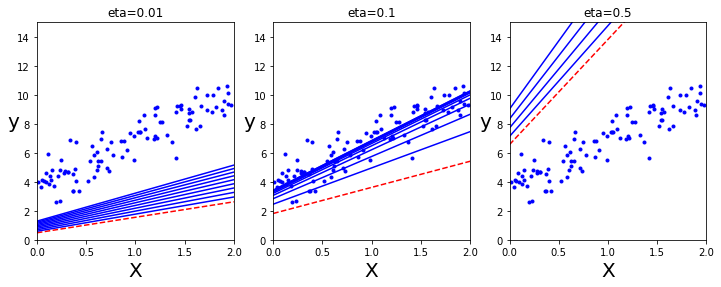

In [53]:
np.random.seed(42)
plt.figure(figsize = (12,4))
plt.subplot(1,3,1)
gradirnt_descent(0.01)
plt.subplot(1,3,2)
gradirnt_descent(0.1)
plt.subplot(1,3,3)
gradirnt_descent(0.5)
plt.show()

# Stochastic Gradient Descent

In [54]:
np.random.seed(42)
stochastic_x,stochastic_y = [],[]
def learning_schedule(t ,t0 = 5, t1 = 50):          
    return t0/(t+t1)

def stochastic_gradirnt_descent(eta, epochs):
    theta = np.random.rand(2,1)
    n_iterations = 1000
    m = len(x)

    for epoch in range(epochs):
        for i in range(n_iterations):
            random_index = np.random.randint(0,99)
            xi = x_b[random_index:random_index+1]
            yi =   y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
            eta = learning_schedule(epoch*m+i)
            theta = theta - eta* gradients
        stochastic_x.append(theta[0])
        stochastic_y.append(theta[1])
        if epoch<50:
            style = 'b-' if epoch>0 else 'r--'
            y_pred = x_new_b.dot(theta)
            plt.plot(x_new, y_pred, style,linewidth = 0.1)
    
    plt.plot(x,y,'b.')
    plt.axis([0,2,0,15])
    plt.xlabel('X',fontsize = 20)
    plt.ylabel('y', rotation = 0, fontsize = 20)
    plt.title(f'eta={eta}' )

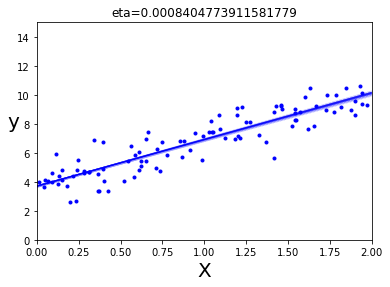

In [55]:
stochastic_gradirnt_descent(0.1,50)

In [56]:
# Mini batch Gradient Descent

In [57]:
np.random.seed(42)
mini_x, mini_y = [],[]
def mini_batch_gradirnt_descent(eta, epochs):
    theta = np.random.rand(2,1)
    n_iterations = 1000
    m = len(x)
    batch_size = 10

    for epoch in range(epochs):
        for i in range(n_iterations):
            random_index = np.random.randint(0,99)
            xi = x_b[random_index:random_index+batch_size]
            yi =   y[random_index:random_index+batch_size]
            gradients = 2/batch_size * xi.T.dot(xi.dot(theta)-yi)
            eta = learning_schedule(epoch*m+i)
            theta = theta - eta* gradients
        
        mini_x.append(theta[0])
        mini_y.append(theta[1])
        if epoch<50:
            style = 'b-' if epoch>0 else 'r--'
            y_pred = x_new_b.dot(theta)
            plt.plot(x_new, y_pred, style,linewidth = 0.1)
    
    plt.plot(x,y,'b.')
    plt.axis([0,2,0,15])
    plt.xlabel('X',fontsize = 20)
    plt.ylabel('y', rotation = 0, fontsize = 20)
    plt.title(f'eta={eta}' )

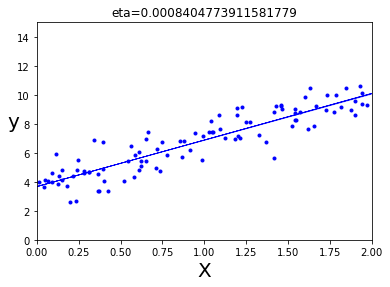

In [58]:
mini_batch_gradirnt_descent(0.1,50)

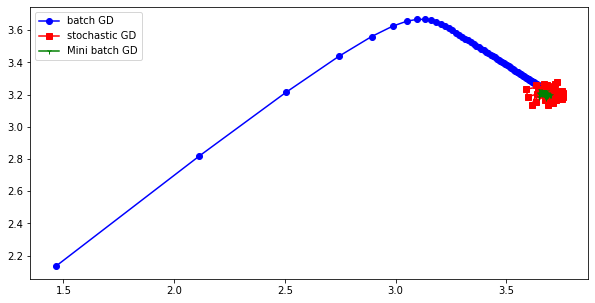

In [65]:
plt.figure(figsize=(10,5))
plt.plot(batch_x,batch_y, 'b-', marker = 'o', label = 'batch GD')
plt.plot(stochastic_x,stochastic_y, 'r-', marker = 's',label = 'stochastic GD')
plt.plot(mini_x,mini_y, 'g-', marker = '1', label = 'Mini batch GD')
plt.legend()
plt.show()

# Polynomial Regression

In [108]:
x = 6 * np.random.rand(100,1) - 3
y = 0.5*x**2+ x + 2 + np.random.randn(100,1)

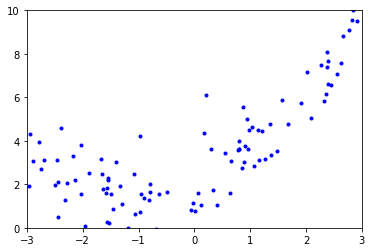

In [109]:
plt.plot(x,y,'b.')
plt.axis([-3,3,0,10])
plt.show()

In [110]:
from sklearn.preprocessing import PolynomialFeatures
ploy_feature = PolynomialFeatures(degree =2, include_bias = False)

In [114]:
x_new_poly = ploy_feature.fit_transform(x,y)

In [115]:
lin_reg.fit(x_new_poly,y)

LinearRegression()

In [116]:
lin_reg.intercept_,lin_reg.coef_

(array([2.06378633]), array([[1.03980376, 0.49203671]]))

In [125]:
x_new = np.linspace(-3,3,100).reshape(100,1)
x_poly_300 = ploy_feature.fit_transform(x,y)
lin_reg.fit(x_poly_300,y)

LinearRegression()

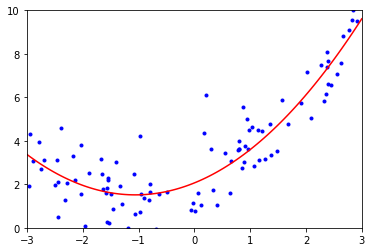

In [121]:
plt.plot(x,y,'b.')
plt.plot(x_new,y_pred,'r-')
plt.axis([-3,3,0,10])
plt.show()

In [129]:
poly_300 = PolynomialFeatures(degree= 300, include_bias = False)
x_300 = poly_300.fit_transform(x)
lin_reg.fit(x_300,y)

LinearRegression()

In [130]:
x_new_300 = poly_300.fit_transform(x_new)
y_pred_300 = lin_reg.predict(x_new_300)

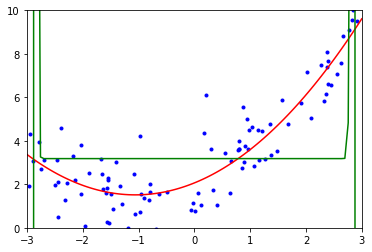

In [132]:
plt.plot(x,y,'b.')
plt.plot(x_new,y_pred,'r-')
plt.plot(x_new,y_pred_300,'g-')
plt.axis([-3,3,0,10])
plt.show()